In [1]:
import math
import random
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import yfinance as yf
import datetime as dte

In [20]:

djia = ['MMM','AA','MO','AXP','AIG','T','BA','CAT','C','KO','DD','GE','XOM','HON','HPQ','HD','INTC',
        'IBM','JNJ','JPM','MCD','MRK','MSFT','PFE','PG','UT','VZ','WM','DIS']
stock_list = random.sample(djia, k=5)
df = yf.download(stock_list,dte.datetime(1997,6,1),dte.datetime(2007,5,1),interval='1mo')['Adj Close']
df = df.dropna()

[*********************100%***********************]  5 of 5 completed


In [21]:
df

,AIG,C,HPQ,IBM,MCD
Date,,,,,
1997-06-01,464.415894,127.926453,6.456482,27.805273,14.062370
1997-07-01,497.076874,145.930038,8.091874,32.580696,15.645066
1997-08-01,440.484924,129.083832,7.109293,31.232803,13.771297
1997-09-01,481.616119,138.866730,8.041301,32.718380,13.885737
1997-10-01,476.729706,142.297165,7.138238,30.403395,13.065713
...,...,...,...,...,...
2007-01-01,934.594238,442.191406,14.395362,65.556274,29.129454
2007-02-01,916.298279,404.011963,13.088211,61.450340,28.695955
2007-03-01,920.073853,415.865692,13.350977,62.510914,29.589220


Let's look at the charts of these stocks to see what we have.

<AxesSubplot:xlabel='Date'>

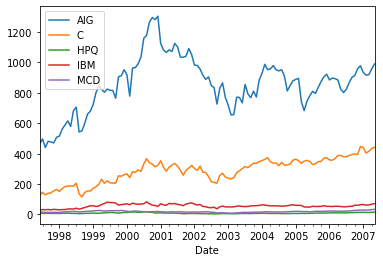

In [22]:
df.plot()

In [23]:
ret_M = df.pct_change()
ret_M.describe()

,AIG,C,HPQ,IBM,MCD
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.008948,0.013990,0.014106,0.012017,0.010076
std,0.071959,0.083731,0.117603,0.092854,0.074741
min,-0.231041,-0.338901,-0.319892,-0.224740,-0.256734
25%,-0.030340,-0.026534,-0.056339,-0.039739,-0.039580
50%,0.008352,0.016281,0.009959,0.004764,0.021534
75%,0.045572,0.057048,0.079363,0.053811,0.058968
max,0.238162,0.253334,0.361970,0.353799,0.182572


We will need to get some Portfolio Weights to build our model to optimize risk and return

In [24]:
weights = []
g = np.eye(len(stock_list))
for i in range(len(stock_list)):
    #g2 = g[i].tolist()    
    weights.append(g[i])
    
#There is probably a better way to get more variation here, I will think of something
for j in range(100):
    x = np.random.randint(0,100,size=len(stock_list))
    n = x / x.sum()                        #   Our Unit Vector for weighting 
    weights.append(n)

dfs = pd.DataFrame({'Weights': weights})
dfs

,Weights
0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.0, 1.0, 0.0, 0.0, 0.0]"
2,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 1.0, 0.0]"
4,"[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...
100,"[0.0, 0.30454545454545456, 0.3090909090909091,..."
101,"[0.2612137203166227, 0.18469656992084432, 0.08..."
102,"[0.11702127659574468, 0.2765957446808511, 0.16..."
103,"[0.28421052631578947, 0.23508771929824562, 0.0..."


In [25]:
# Create Covariance Matrix
cov_M = ret_M.cov()
cov_M = cov_M.to_numpy()
cov_M

array([[0.00517811, 0.00345408, 0.0015858 , 0.00179719, 0.00256594],
       [0.00345408, 0.00701093, 0.00344736, 0.00407607, 0.00235039],
       [0.0015858 , 0.00344736, 0.01383057, 0.00605574, 0.00177407],
       [0.00179719, 0.00407607, 0.00605574, 0.00862193, 0.00186048],
       [0.00256594, 0.00235039, 0.00177407, 0.00186048, 0.00558626]])

Fill in dfs spreadsheet, Portfolio risk/return points will come from this.

In [26]:
# Find the result \sum w_i * w_j * cov(R_i,R_j)

K = cov_M - np.diag(cov_M)*np.eye(len(cov_M))
print(dfs.loc[0])

def cov_sum(row):
    w = np.array(dfs.loc[row][0])
    #print(w)
    sum = 0
    for i in range(K.shape[0]):
        for j in range(K.shape[1]):
            sum += K[i][j] * w[i] * w[j]
    return sum
    
print('ok')
dfs

Weights    [1.0, 0.0, 0.0, 0.0, 0.0]
Name: 0, dtype: object
ok


,Weights
0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.0, 1.0, 0.0, 0.0, 0.0]"
2,"[0.0, 0.0, 1.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 1.0, 0.0]"
4,"[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...
100,"[0.0, 0.30454545454545456, 0.3090909090909091,..."
101,"[0.2612137203166227, 0.18469656992084432, 0.08..."
102,"[0.11702127659574468, 0.2765957446808511, 0.16..."
103,"[0.28421052631578947, 0.23508771929824562, 0.0..."


In [27]:


# Find the expected returns for each stock
mu = []
for i in range(len(stock_list)):
    ret = ret_M[stock_list[i]].mean()
    mu.append(ret)
mu = np.array(mu)
#print(len(mu))
#print(len(dfs.loc[0][0]))

#  Now lets get in to more intense financial matters with the risk free rate
#  Then calculate the sharpe ratio of each stock portfolio
RFR = 0.0042          # 1 year t-bill yeild, 5% annualy

Exp_ret = []
Var_ret = []
St_dev = []
Sharpe = []
#weights_squared = np.square(dfs.loc[i])
for i in range(len(dfs)):
    row = dfs.loc[i][0]
    #print('Length of row is: ' + str(len(dfs.loc[i][0])))
    temp1 = np.dot(row,mu)
    Exp_ret.append(temp1)
    weights_squared = np.square(row)
    temp2 = np.dot(weights_squared,np.diag(cov_M)) + cov_sum(i)
    Var_ret.append(temp2)
    stdev_ret = math.sqrt(temp2)
    St_dev.append(stdev_ret)
    sr = (temp1 - RFR) / stdev_ret
    Sharpe.append(sr)
dfs['ExR'] = Exp_ret
dfs['Var'] = Var_ret
dfs['StDev'] = St_dev
dfs['Sharpe'] = Sharpe

In [28]:
dfs

,Weights,ExR,Var,StDev,Sharpe
0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0.013990,0.005178,0.071959,0.136052
1,"[0.0, 1.0, 0.0, 0.0, 0.0]",0.010076,0.007011,0.083731,0.070177
2,"[0.0, 0.0, 1.0, 0.0, 0.0]",0.014106,0.013831,0.117603,0.084233
3,"[0.0, 0.0, 0.0, 1.0, 0.0]",0.008948,0.008622,0.092854,0.051134
4,"[0.0, 0.0, 0.0, 0.0, 1.0]",0.012017,0.005586,0.074741,0.104590
...,...,...,...,...,...
100,"[0.0, 0.30454545454545456, 0.3090909090909091,...",0.010984,0.006040,0.077717,0.087285
101,"[0.2612137203166227, 0.18469656992084432, 0.08...",0.011678,0.003559,0.059654,0.125360
102,"[0.11702127659574468, 0.2765957446808511, 0.16...",0.011091,0.004476,0.066904,0.102994
103,"[0.28421052631578947, 0.23508771929824562, 0.0...",0.011733,0.003537,0.059472,0.126660


<AxesSubplot:xlabel='StDev'>

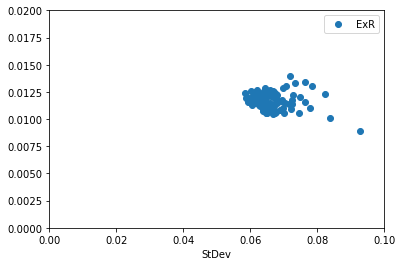

In [29]:
dfs.plot(x='StDev', y='ExR',style='o',xlim=[0,0.1],ylim=[0,0.02])

In [30]:
maxRow = dfs['Sharpe'].argmax()
Alloc_Ideal = dfs.loc[maxRow][0]
print('Optimized portfolio consists of: \n')
for i in range(len(Alloc_Ideal)):
    print('{:.4f}'.format(Alloc_Ideal[i]*100) + ' %  ' + str(stock_list[i]))
exReturn = dfs.loc[maxRow][1]*100
exStDev = dfs.loc[maxRow][3]*100
exSharpe = dfs.loc[maxRow][4]
print('Which will give an expected monthly return of ' + '{:.1f}'.format(exReturn) + '%')
print('With monthly standard deviation of ' + '{:.1f}'.format(exStDev) + '%')
print('and a Sharpes ratio of ' + '{:.4f}'.format(exSharpe))

Optimized portfolio consists of: 

38.9671 %  C
5.1643 %  MCD
5.1643 %  HPQ
12.6761 %  AIG
38.0282 %  IBM
Which will give an expected monthly return of 1.2%
With monthly standard deviation of 5.8%
and a Sharpes ratio of 0.1403


In [31]:
df2 = yf.download(stock_list,dte.datetime(2007,6,1),dte.datetime(2008,5,1),interval='1mo')['Adj Close']
df2 = df2.dropna()

[*********************100%***********************]  5 of 5 completed


In [32]:
df2

,AIG,C,HPQ,IBM,MCD
Date,,,,,
2007-06-01,960.740723,419.633728,14.870720,70.070885,33.339592
2007-07-01,880.484924,381.016724,15.367497,73.666000,31.441408
2007-08-01,905.453491,383.552917,16.475906,77.687134,32.347809
2007-09-01,928.089539,386.287201,16.622807,78.703461,35.776337
2007-10-01,868.552368,346.805908,17.282093,77.581024,39.244286
2007-11-01,799.888428,275.623810,17.108200,70.271858,38.403576
2007-12-01,802.227905,246.856110,16.880816,72.478943,39.710083
2008-01-01,759.133789,236.207016,14.642823,71.815155,36.117237
2008-02-01,647.135193,201.118149,15.999267,76.340919,36.474483


<AxesSubplot:xlabel='Date'>

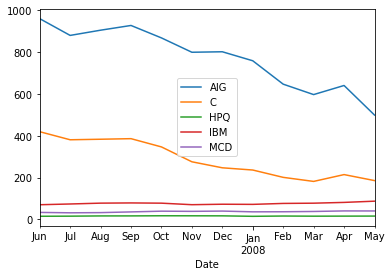

In [33]:
df2.plot()

In [34]:
ret_M2 = df2.pct_change()
ret_M2.describe()

,AIG,C,HPQ,IBM,MCD
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,-0.054240,-0.066578,0.007163,0.021045,0.018954
std,0.084299,0.103308,0.060259,0.047775,0.060630
min,-0.220779,-0.205251,-0.132576,-0.094213,-0.090477
25%,-0.081295,-0.119064,-0.011677,0.001962,-0.012893
50%,-0.064150,-0.096584,0.015318,0.031408,0.028828
75%,0.013962,-0.018241,0.036534,0.052946,0.053014
max,0.072890,0.179739,0.092635,0.072328,0.105989


In [35]:
# This is our allocation optimized above
w_ideal = Alloc_Ideal

# Create Covariance Matrix
cov_M2 = ret_M2.cov()
cov_M2 = cov_M2.to_numpy()

In [36]:
mu = []
for i in range(len(stock_list)):
    ret = ret_M2[stock_list[i]].mean()
    mu.append(ret)
mu = np.array(mu)

K2 = cov_M2 - np.diag(cov_M2)*np.eye(len(cov_M2))

RFR2 = 0.00208     # 2.5% rate 1 year t-bill divided by 12 months

def cov_sum_2():
    
    w = w_ideal
    #print(w)
    sum = 0
    for i in range(K2.shape[0]):
        for j in range(K.shape[1]):
            sum += K[i][j] * w[i] * w[j]
    
    return sum

results = [w_ideal]
res_mean = np.dot(w_ideal,mu)
results.append(res_mean)

w_ideal_sq = np.square(w_ideal)
res_var = np.dot(w_ideal_sq, np.diag(cov_M2)) + cov_sum_2()
results.append(res_var)
t_sd = math.sqrt(res_var)
results.append(t_sd)
sr2 = (res_mean - RFR2) / t_sd
results.append(sr2)

In [37]:
print('Which will give an expected monthly return of ' + '{:.1f}'.format(results[1]*100) + '%')
print('With monthly standard deviation of ' + '{:.1f}'.format(results[3]*100) + '%')
print('and a Sharpes ratio of ' + '{:.4f}'.format(results[4]))

Which will give an expected monthly return of -2.3%
With monthly standard deviation of 5.8%
and a Sharpes ratio of -0.4435


Most likely this result is not so hot, the equities are chosen randomly.  Especially if AIG was included in the initial allocation, it was the epicenter of the crisis.  We must remember that past performance does not dictate future performance.  This should give evidence that Modern Portfolio Theory does not protect against systemic risk.  